|  |  |  |
| ---: | :--- | :--- |
| Проект:| Сборный проект - 2 | 08 |
| Срок обучения на момент сдачи: | 4 месяца |

# Коэффициент восстановления золота

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Вам нужно:

*    Подготовить данные;
*    Провести исследовательский анализ данных;
*    Построить и обучить модель.

# Содержание

1  [Описание проекта и постановка задачи](#1)

*    1.1  [Технологический процесс](#11)
*    1.2  [Описание данных](#12)
*    1.3  [Расчёт эффективности](#13)
*    1.4  [Метрика качества](#14)
*    1.5  [Таблица имен DataFrame](#DataFrame_names)

2  [Загрузка и подготовка данных](#2)

*    2.1  [Изменение названий столбцов](#21)
*    2.2  [Проверка правильности расчета rougher.output.recovery](#22)
*    2.3  [Проверка правильности расчета final.output.recovery](#23)
*    2.4  [Анализ признаков, недоступных в тестовой выборке](#24)
*    2.5  [Выводы по данным](#25)

3  [Предобработка данных](#3)

*    3.1  [Тип данных](#31)
*    3.2  [Замена пропусков интерполяцией](#32)
*    3.3  [Замена пропусков нулями](#33)
*    3.4  [Удаление пропусков](#34)

4  [Анализ данных](#4)

*    4.1  [Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки](#41)
*    4.2  [Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках](#42)
*    4.3  [Исследование суммарных концентраций веществ на разных стадиях](#43)

5  [Удаление выбросов](#5)

*    5.1  [Не удаляем](#51)
*    5.2  [Удаляем строки с концентрацией < 0.05](#52)
*    5.3  [Выбор и масштабирование признаков](#53)

6  [Функция для вычисления sMAPE](#6)

7  [Обучение и проверка моделей](#6)

*    7.1  [Линейная регрессия](#71)
*    7.2  [Дерево решений](#72)
*    7.3  [Случайный лес](#73)
*    7.4  [DummyRegressor](#74)
*    7.5  [Сравнение моделей](#75)

8  [Проверка на тестовой выборке](#8)

9  [Выводы](#9)

<a name="1"></a>
## Описание проекта и постановка задачи

<a name="11"></a>
### Технологический процесс
Ниже описан технологический процесс очистки руды. Решите сами, какие детали нужны для построения модели, а какие — нет.

Как золото получают из руды? Изучите внимательно стадии процесса.
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

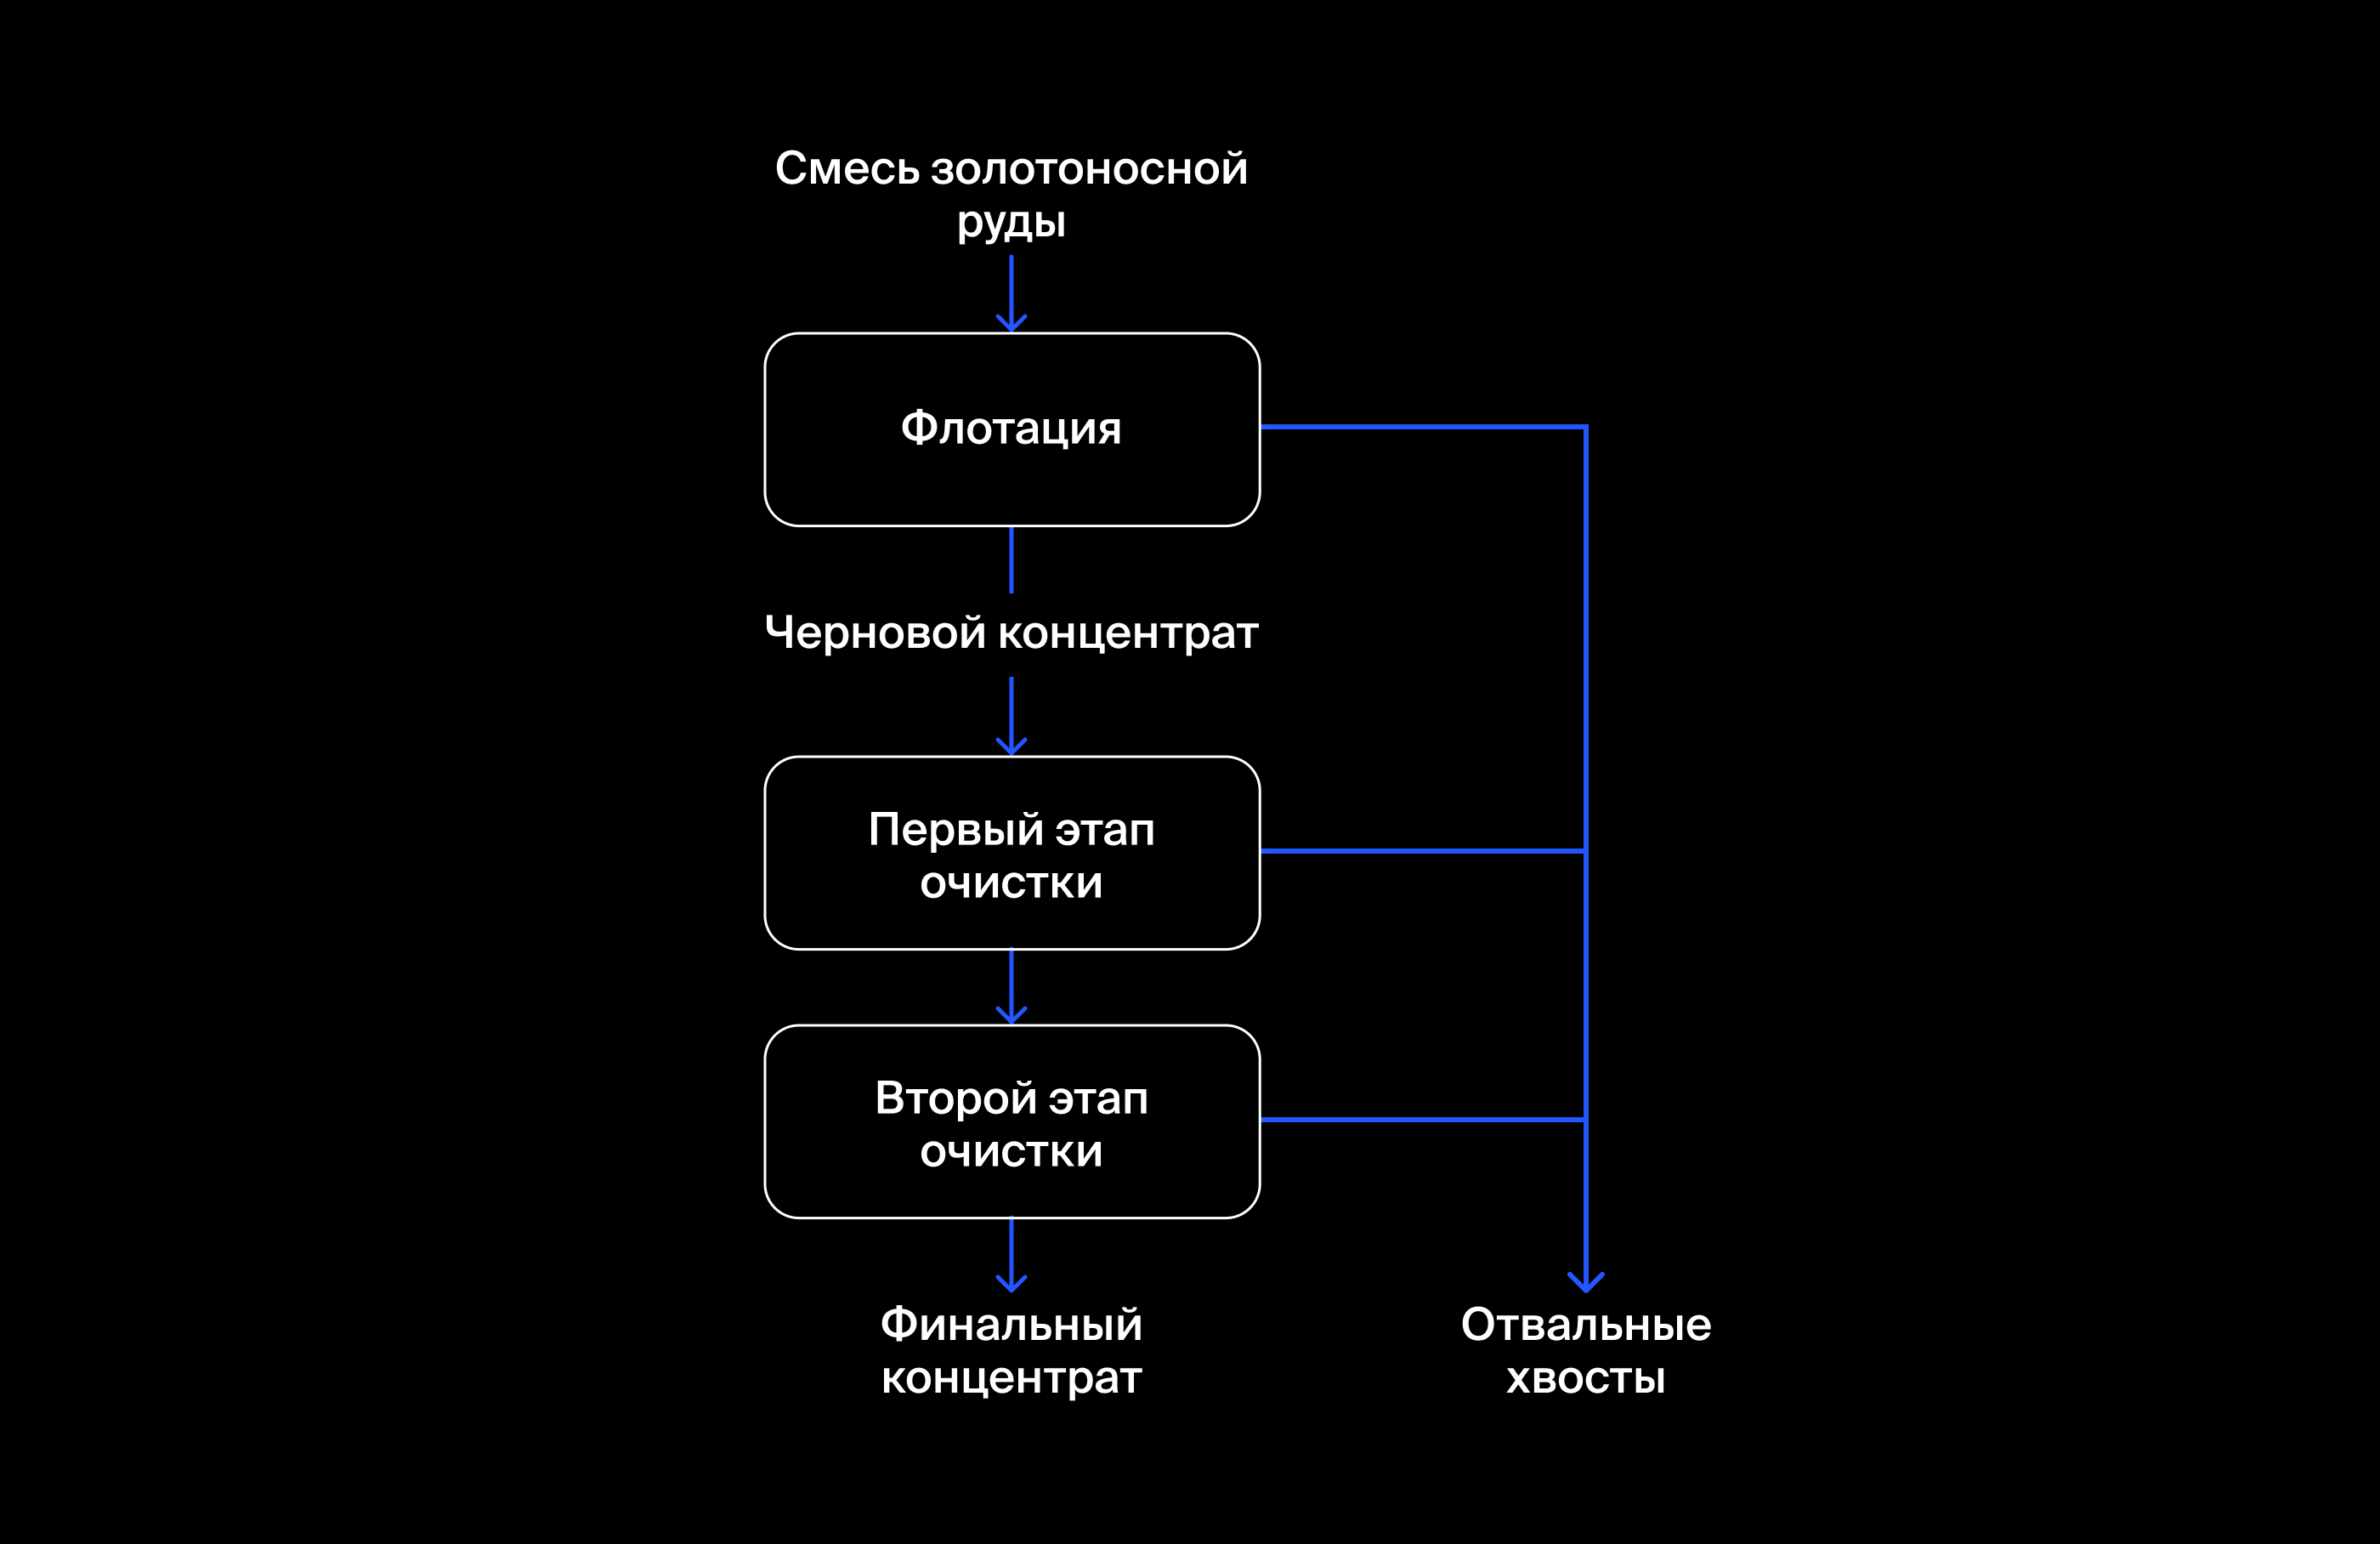

Опишем каждую стадию:

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

<a name="12"></a>
### Описание данных

Данные находятся в трёх файлах:
* gold_recovery_train.csv — обучающая выборка;
* gold_recovery_test.csv — тестовая выборка;
* gold_recovery_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date).  
Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте их на корректность.

**Процесс**

*    Rougher feed — исходное сырье
*    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
*        Xanthate **— ксантогенат (промотер, или активатор флотации);
*        Sulphate — сульфат (на данном производстве сульфид натрия);
*        Depressant — депрессант (силикат натрия).
*    Rougher process (англ. «грубый процесс») — флотация
*    Rougher tails — отвальные хвосты
*    Float banks — флотационная установка
*    Cleaner process — очистка
*    Rougher Au — черновой концентрат золота
*    Final Au — финальный концентрат золота

**Параметры этапов**

*    air amount — объём воздуха
*    fluid levels — уровень жидкости
*    feed size — размер гранул сырья
*    feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:

*этап.тип_параметра.название_параметра*

Пример: rougher.input.feed_ag

Возможные значения для блока этап:

*    rougher — флотация
*    primary_cleaner — первичная очистка
*    secondary_cleaner — вторичная очистка
*    final — финальные характеристики

Возможные значения для блока тип_параметра:

*    input — параметры сырья
*    output — параметры продукта
*    state — параметры, характеризующие текущее состояние этапа
*    calculation — расчётные характеристики

<a name="13"></a>
### Расчёт эффективности

Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.
Эффективность обогащения рассчитывается по формуле:

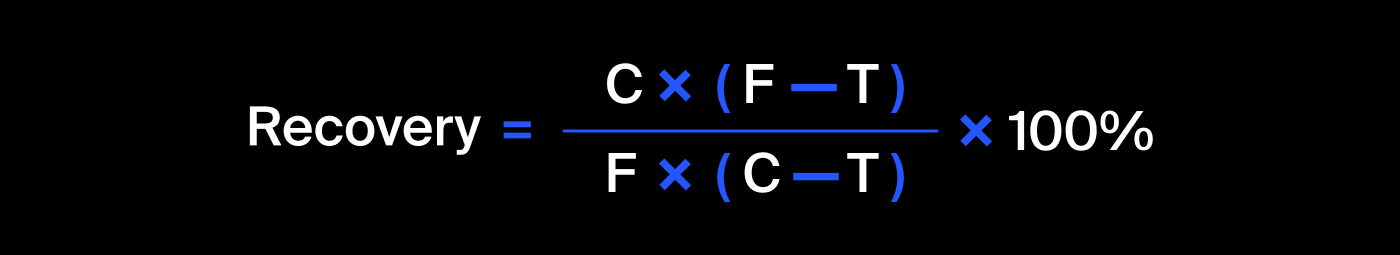

где:

    C — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

<a name="14"></a>
### Метрика качества

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.
Метрика sMAPE вычисляется так:

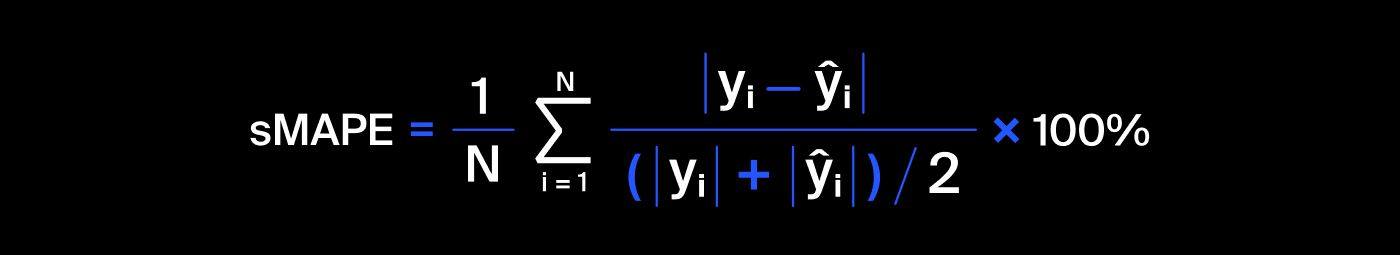

Нужно спрогнозировать сразу две величины:

    эффективность обогащения чернового концентрата rougher.output.recovery;
    эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

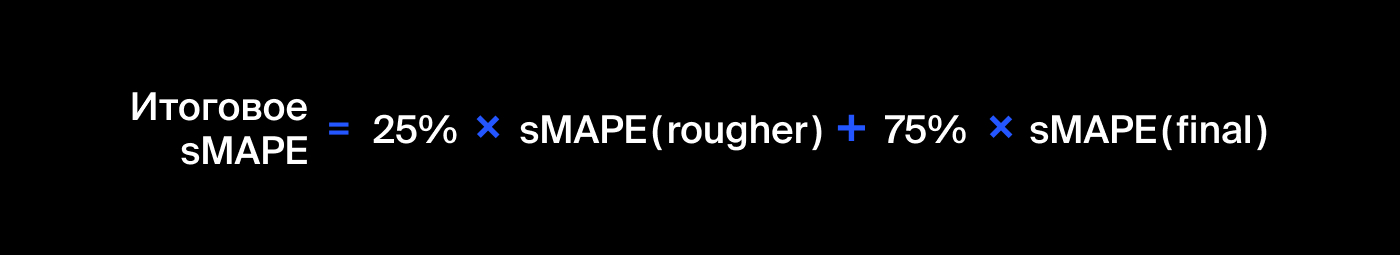

<a name="DataFrame_names"></a>
### Таблица имен DataFrame

В проекте я использую следующие имена для DataFrame:



Этап загрузки | Этап замены NaN | Этап удаления выбросов | Количество строк | Доля потерь
--- |--- | --- | --- | ---
 | | | |
data_train | data_train_int | data_train_int_nodrop | 16 860 |
 | | data_train_int_drop2 | 15 418 | (-8.6%)
 | | | |
 | data_train_fillna0 | data_train_fillna0_nodrop | 16 860 |
 | | data_train_fillna0_drop2 | 15 405 | (-8.6%)
 | | | |
 | data_train_dropNA | data_train_dropNA_nodrop | 11 017 | (-34.7%)
 |  | data_train_dropNA_drop2 | 11 017 | (-34.7%)
 --- |--- | --- | --- | ---
data_test | | | 5 856 |
 | data_test_drop | | 5 471 | (-6.6%)
 | data_test_drop_merge_drop | | 5 290 | (-9.7%)
 

<a name="2"></a>
## Загрузка и подготовка данных
* Откройте файлы и изучите их.  
* Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.  
* Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?  
* Проведите предобработку данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import display

from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

In [2]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [3]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

*Для удобства во многих местах использую транспонированное отображение таблиц*

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(data_train.sample(3).T)
#display(data_test.sample(3))
#display(data_full.sample(3))

,1402,2105,13151
date,2016-03-13 10:00:00,2016-04-11 17:00:00,2018-03-16 22:59:59
final.output.concentrate_ag,4.79407,5.60228,5.03315
final.output.concentrate_pb,9.38629,11.5679,10.9557
final.output.concentrate_sol,4.56489,7.89735,6.4568
final.output.concentrate_au,45.5027,43.1557,38.4055
final.output.recovery,62.9036,65.1621,74.4892
final.output.tail_ag,10.6854,7.82156,9.19957
final.output.tail_pb,1.85747,2.32663,2.13857
final.output.tail_sol,17.5172,11.7591,7.22532
final.output.tail_au,3.16497,2.75897,2.32532


In [5]:
#data_train.info()
#data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


<a name="21"></a>
### Изменение названий столбцов
Названия столбцов слишком громоздкие. Сократим длинные наименования этапов и обозначений.

In [6]:
# переименуем названия столбцов
for df in [data_train, data_test, data_full]:
    columns=df.columns
    columns1 = [row.replace('.', '_') for row in columns]
    columns2 = [row.replace('primary_cleaner', '1cl') for row in columns1]
    columns3 = [row.replace('rougher', '0cl') for row in columns2]
    columns4 = [row.replace('secondary_cleaner', '2cl') for row in columns3]
    columns5 = [row.replace('floatbank', 'fb') for row in columns4]
    columns6 = [row.replace('concentrate', 'con') for row in columns5]
    columns7 = [row.replace('input', 'in') for row in columns6]
    columns8 = [row.replace('output', 'out') for row in columns7]
    columns9 = [row.replace('state', 'st') for row in columns8]
    columns10 = [row.replace('calculation', 'calc') for row in columns9]
    df.set_axis(columns10, axis='columns', inplace=True)
#data_train.info()

In [7]:
# признаки "полезной" концентрации металлов на разных этапах
au_con = ['0cl_in_feed_au', '0cl_out_con_au', '1cl_out_con_au', 'final_out_con_au']
ag_con = ['0cl_in_feed_ag', '0cl_out_con_ag', '1cl_out_con_ag', 'final_out_con_ag']
pb_con = ['0cl_in_feed_pb', '0cl_out_con_pb', '1cl_out_con_pb', 'final_out_con_pb']
legend = ['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки']

# признаки концентрации в "хвостах" на разных этапах
au_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
ag_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
pb_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
legend_tail = ['после флотации', 'после первичной очистки', 'после вторичной очистки', 'финальные хвосты']

<a name="22"></a>
### Проверка правильности расчета rougher.output.recovery

In [8]:
#вынесем необходимые данные в отдельный df
data_MAE = data_train.loc[:, ['0cl_out_recovery', '0cl_out_con_au', '0cl_in_feed_au', '0cl_out_tail_au']]

_c1 = data_MAE['0cl_out_con_au']
_f1 = data_MAE['0cl_in_feed_au']
_t1 = data_MAE['0cl_out_tail_au']
data_MAE['0cl_out_recovery_2'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

data_MAE.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE.dropna(subset=['0cl_out_recovery_2'], inplace=True) 
print()
data_MAE.info()

print('Нет первоначального расчета rougher.output.recovery')
display(data_MAE[data_MAE['0cl_out_recovery']!=data_MAE['0cl_out_recovery']].sample(5).T)

data_MAE.dropna(inplace=True)

display(data_MAE.loc[:, ['0cl_out_recovery', '0cl_out_recovery_2']].sample(5).T)
MAE = mean_absolute_error(data_MAE['0cl_out_recovery'], data_MAE['0cl_out_recovery_2'])
print(MAE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      16778 non-null  float64
 2   0cl_in_feed_au      16777 non-null  float64
 3   0cl_out_tail_au     14611 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      14577 non-null  float64
 2   0cl_in_feed_au      14577 non-null  float64
 3   0cl_out_tail_au     14577 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 683.3 KB
Нет первонача

,16022,9358,837,12572,14066
0cl_out_recovery,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,3.378131,3.088738,8.347044,0.010000,0.010000
0cl_in_feed_au,6.637190,6.681114,11.484935,9.019502,8.529353
0cl_out_tail_au,0.988104,1.537121,1.521192,1.627054,1.346981
0cl_out_recovery_2,120.300549,153.266765,106.088867,-0.506852,-0.629835


,12553,14821,8388,1620,12514
0cl_out_recovery,93.486332,90.112816,80.954357,77.971682,93.032137
0cl_out_recovery_2,93.486332,90.112816,80.954357,77.971682,93.032137


9.444891926100695e-15


<a name="23"></a>
### Проверка правильности расчета final.output.recovery

In [9]:
#вынесем необходимые данные в отдельный df
data_MAE_2 = data_train.loc[:, ['final_out_recovery', 'final_out_con_au', '0cl_in_feed_au', 'final_out_tail_au']]

_c2 = data_MAE_2['final_out_con_au'] 
_f2 = data_MAE_2['0cl_in_feed_au']
_t2 = data_MAE_2['final_out_tail_au']
data_MAE_2['final_out_recovery_2'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

data_MAE_2.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE_2.dropna(subset=['final_out_recovery_2'], inplace=True) 
print()
data_MAE_2.info()
print()
print('Нет первоначального расчета final_out_recovery')
display(data_MAE_2[data_MAE_2['final_out_recovery']!=data_MAE_2['final_out_recovery']].sample(5).T)

data_MAE_2.dropna(inplace=True)

display(data_MAE_2.loc[:, ['final_out_recovery', 'final_out_recovery_2']].sample(5).T)
MAE_2 = mean_absolute_error(data_MAE_2['final_out_recovery'], data_MAE_2['final_out_recovery_2'])
print(MAE_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   final_out_recovery    15339 non-null  float64
 1   final_out_con_au      16789 non-null  float64
 2   0cl_in_feed_au        16777 non-null  float64
 3   final_out_tail_au     16794 non-null  float64
 4   final_out_recovery_2  15582 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15582 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   final_out_recovery    15339 non-null  float64
 1   final_out_con_au      15582 non-null  float64
 2   0cl_in_feed_au        15582 non-null  float64
 3   final_out_tail_au     15582 non-null  float64
 4   final_out_recovery_2  15582 non-null  float64
dtypes: float64(5)
memory u

,14277,14847,15303,10408,4573
final_out_recovery,NaN,NaN,NaN,NaN,NaN
final_out_con_au,46.612522,0.010000,16.387029,40.124138,5.648317
0cl_in_feed_au,0.596598,6.388325,0.010000,0.000000,8.875693
final_out_tail_au,0.635834,1.125374,2.319718,2.178259,2.976186
final_out_recovery_2,-6.667570,-0.738621,-26905.935983,-inf,140.499506


,1913,16059,15925,12504,294
final_out_recovery,64.178103,60.259748,74.143633,83.636137,69.439973
final_out_recovery_2,64.178103,60.259748,74.143633,83.636137,69.439973


8.158251945945868e-15


In [10]:
#Посмотрим на низкие значения концентрации на разных этапах
display(data_train[data_train['0cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['1cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['final_out_con_au']<2][au_con].sample(15).T)

,16251,11707,15620,5913,9288,5745,12394,10917,15642,16403,16654,9499,7517,1984,8698
0cl_in_feed_au,0.01,0.0,0.01,0.0,6.991321,8.520324,8.072124,7.052392,7.690807,8.603210,10.120533,0.0,0.0,0.0,0.0
0cl_out_con_au,0.01,0.0,0.01,0.0,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.010000,0.0,0.0,0.0,0.0
1cl_out_con_au,0.01,0.0,0.01,0.0,36.696186,35.008753,32.282020,29.089685,0.010000,28.788866,0.010000,0.0,0.0,0.0,0.0
final_out_con_au,0.01,0.0,0.01,0.0,47.841606,46.646369,45.316096,31.387161,44.869398,46.385498,45.464599,0.0,0.0,0.0,0.0


,13548,11462,5922,2585,11487,8767,4179,8795,16651,4060,1844,7528,11537,8650,14274
0cl_in_feed_au,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.278844,0.0,0.0,0.0,0.0,0.0,0.889864
0cl_out_con_au,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.649792,0.0,0.0,0.0,0.0,0.0,16.301428
1cl_out_con_au,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.0,0.010000
final_out_con_au,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.770754,0.0,0.0,0.0,0.0,0.0,50.518813


,5863,12046,5904,5879,4123,5941,5898,12045,14002,2308,2581,8796,5842,4158,5913
0cl_in_feed_au,0.0,0.0,0.0,0.0,0.0,8.088235,0.0,0.0,0.010000,6.532435,0.0,0.0,0.0,7.289615,0.0
0cl_out_con_au,0.0,0.0,0.0,0.0,0.0,20.389340,0.0,0.0,0.010000,0.000000,0.0,0.0,0.0,23.855433,0.0
1cl_out_con_au,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,18.587496,0.000000,0.0,0.0,0.0,41.364399,0.0
final_out_con_au,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.010000,0.000000,0.0,0.0,0.0,0.000000,0.0


Расчет rougher.output.recovery и final.output.recovery в исходных данных произведен правильно, но есть строки с отсутствующими значениями которые можно "досчитать" после заполнения ошибок (нули и околонулевые значения) в "столбцах-родителях".

<a name="24"></a>
### Анализ признаков, недоступных в тестовой выборке

In [11]:
data_targ = data_train.copy()

for col in data_train.columns:
    if col in data_test.columns:
        del data_targ[col]
    
data_targ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   final_out_con_ag                  16788 non-null  float64
 1   final_out_con_pb                  16788 non-null  float64
 2   final_out_con_sol                 16490 non-null  float64
 3   final_out_con_au                  16789 non-null  float64
 4   final_out_recovery                15339 non-null  float64
 5   final_out_tail_ag                 16794 non-null  float64
 6   final_out_tail_pb                 16677 non-null  float64
 7   final_out_tail_sol                16715 non-null  float64
 8   final_out_tail_au                 16794 non-null  float64
 9   1cl_out_con_ag                    16778 non-null  float64
 10  1cl_out_con_pb                    16502 non-null  float64
 11  1cl_out_con_sol                   16224 non-null  float64
 12  1cl_

В тестовой выборке отсутствуют признаки, значения которых нельзя установить/получить до начала или в процессе обработки руды.  

<a name="25"></a>
### Выводы по данным

По данным имеем следующее:
* Столбец date - перевести в формат DateTime  
* Есть 0 и околонулевые значения в столбцах со значениями концентраций ("con" в названии). Вероятно связано с остановкой и запуском оборудования (возможно на профилактику/регламентные работы или из-за отсутствия сырья).  
* Часть отсутствующих значений recovery можно рассчитать после заполнения столбцов "родителей".

<a name="3"></a>
## Предобработка данных  
[Таблица имен DataFrame](#DataFrame_names)

Реализовано несколько сценариев обработки пропусков: замена интерполяцией, замена околонулевым значением, удаление. 

<a name="31"></a>
### Тип данных

In [12]:
# переведем date в datetime
for df in [data_train, data_test, data_full]:
    df['date'] = pd.to_datetime(df['date']) 

<a name="32"></a>
### Замена пропусков интерполяцией

In [13]:
#поищем NaN
#display(data_train[data_train['0cl_out_con_au']!=data_train['0cl_out_con_au']][au_con].sample(15).T)
display(data_train[data_train['2cl_out_tail_au']!=data_train['2cl_out_tail_au']][au_tail].sample(15).T)

,8724,1943,1965,1952,16150,16164,5659,1972,10432,1938,1948,1310,1966,1944,1937
0cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_out_tail_au,0.0,NaN,NaN,NaN,0.0,0.0,3.199278,NaN,2.301501,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#попробуем интерполяцию
data_train_int = data_train.interpolate()
data_train_int.isna().sum().sum()

0

In [15]:
display(data_train[16143:16155][au_con].T)
display(data_train_int[16143:16155][au_con].T)

,16143,16144,16145,16146,16147,16148,16149,16150,16151,16152,16153,16154
0cl_in_feed_au,7.410750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,15.715523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1cl_out_con_au,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_out_con_au,42.417690,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,NaN,NaN,NaN


,16143,16144,16145,16146,16147,16148,16149,16150,16151,16152,16153,16154
0cl_in_feed_au,7.410750,6.802123,6.193496,5.584868,4.976241,4.367614,3.758987,3.150360,2.541733,1.933105,1.324478,0.715851
0cl_out_con_au,15.715523,14.423923,13.132323,11.840723,10.549123,9.257523,7.965923,6.674323,5.382724,4.091124,2.799524,1.507924
1cl_out_con_au,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
final_out_con_au,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,31.955045,21.492401,11.029756


In [16]:
display(data_train[8814:8827][au_tail].T)
display(data_train_int[8814:8827][au_tail].T)

,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824,8825,8826
0cl_out_tail_au,2.315710,2.460800,2.840179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188127
1cl_out_tail_au,5.366262,3.955477,3.202375,3.532983,1.789070,0.0,7.172451,5.864628,6.461328,5.793215,4.359085,4.958875,13.050508
2cl_out_tail_au,7.877863,6.591340,5.628685,4.650195,2.126977,0.0,2.914524,5.318778,5.390911,7.262666,4.963057,4.798860,8.757024
final_out_tail_au,3.902528,3.601310,3.400009,4.825114,1.863401,0.0,0.000000,1.766515,4.034610,4.652444,3.884315,3.936809,5.554988


,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824,8825,8826
0cl_out_tail_au,2.315710,2.460800,2.840179,2.974974,3.109769,3.244563,3.379358,3.514153,3.648948,3.783742,3.918537,4.053332,4.188127
1cl_out_tail_au,5.366262,3.955477,3.202375,3.532983,1.789070,0.000000,7.172451,5.864628,6.461328,5.793215,4.359085,4.958875,13.050508
2cl_out_tail_au,7.877863,6.591340,5.628685,4.650195,2.126977,0.000000,2.914524,5.318778,5.390911,7.262666,4.963057,4.798860,8.757024
final_out_tail_au,3.902528,3.601310,3.400009,4.825114,1.863401,0.000000,0.000000,1.766515,4.034610,4.652444,3.884315,3.936809,5.554988


Есть строки где концентрация на разных этапах падает до 0 и затем скачет обратно до ожидаемых значений - вероятнее всего ошибки (16143 концентрация золота)(уточнить).  
Есть столбцы в которых значение не меняется от строки к строке - скорее всего ошибки (final_out_con_au строки 16143-16156)(уточнить)  
Есть строки с неожиданными нулями (0 концентрация золота после 1, 2 и финальная для 8819. при этом соседи не нулевые)

<a name="33"></a>
### Замена пропусков нулями

In [17]:
data_train_fillna0 = data_train.fillna(0.000000000001)

<a name="34"></a>
### Удаление пропусков

In [18]:
print(len(data_train.index))
data_train_dropNA = data_train.dropna()
print(len(data_train_dropNA.index))

16860
11017


Теряем 5843 строки (34,7%)

<a name="4"></a>
## Анализ данных

* Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
* Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
* Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.


<a name="41"></a>
### Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

**Золото**

In [19]:
display(data_train_int.loc[:, au_con].sample(10).T)

,10528,4002,4406,11155,10276,5372,9011,7920,14459,2946
0cl_in_feed_au,4.381456,5.529769,9.117923,6.328068,7.713314,9.132670,9.715684,8.678892,1.771984,8.702072
0cl_out_con_au,21.955232,19.288473,20.657615,18.700592,8.251739,22.534635,20.822857,20.931066,15.513813,22.730105
1cl_out_con_au,35.011112,34.084798,34.983746,33.605172,30.829047,35.541615,36.341097,31.424047,36.670798,38.463581
final_out_con_au,46.715486,45.704946,44.461887,45.894269,41.626366,44.892550,48.179100,45.931599,51.499940,46.482265


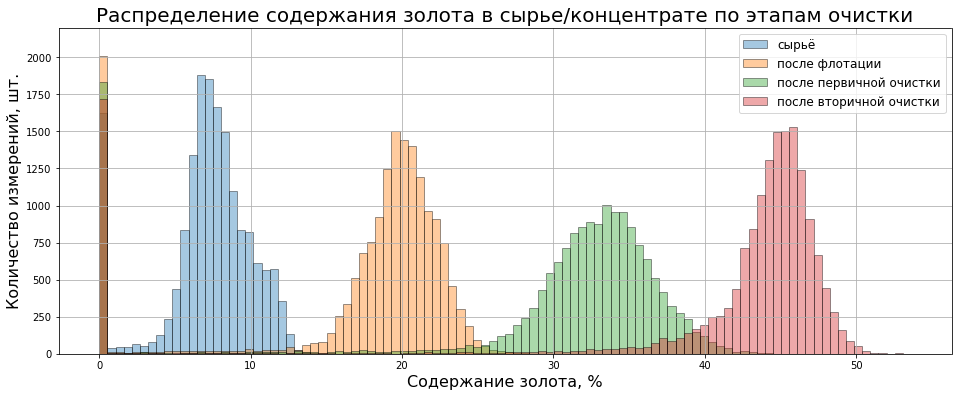

In [20]:
data_train_int[au_con].plot.hist(bins=100, edgecolor = 'black', ylim=(0, 2200), figsize=(16, 6), grid=True, alpha = 0.4)
plt.title('Распределение содержания золота в сырье/концентрате по этапам очистки', fontsize=20); 
plt.ylabel('Количество измерений, шт.', fontsize=16)
plt.xlabel('Содержание золота, %', fontsize=16)
plt.legend(legend, fontsize=12, loc=1);

In [21]:
print('Среднее содержание золота в сырье/концентрате на разных этапах очистки')
display(data_train_int[au_con].mean())

Среднее содержание золота в сырье/концентрате на разных этапах очистки


0cl_in_feed_au       7.140138
0cl_out_con_au      17.327961
1cl_out_con_au      29.032274
final_out_con_au    39.320397
dtype: float64

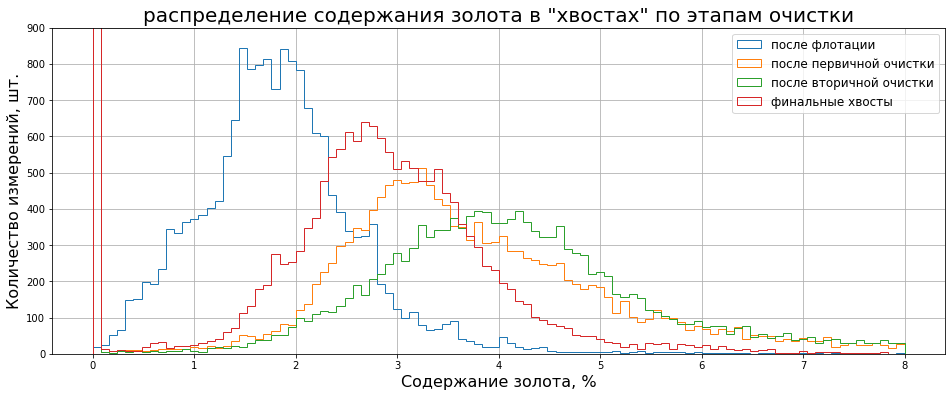

In [22]:
data_train_int[au_tail].plot(
    kind='hist', histtype='step', range=(0, 8), bins=100, ylim=(0, 900), figsize=(16, 6), grid=True)
plt.title('распределение содержания золота в "хвостах" по этапам очистки', fontsize=20) 
plt.ylabel('Количество измерений, шт.', fontsize=16)
plt.xlabel('Содержание золота, %', fontsize=16)
plt.legend(legend_tail, fontsize=12, loc=1);

In [23]:
display(data_train_int.loc[:, au_tail].sample(10).T)

,8357,8137,6126,11302,13883,15658,8591,10699,14235,3123
0cl_out_tail_au,2.198890,1.486518,1.731233,1.994841,1.920182,2.323302,2.302724,1.735388,0.520436,2.268162
1cl_out_tail_au,5.035848,5.713621,3.064039,3.867108,2.743153,3.720765,0.000000,3.675581,1.658401,7.108489
2cl_out_tail_au,4.391882,4.622964,2.896689,2.830026,4.197871,3.323211,0.000000,4.498251,3.167902,4.301668
final_out_tail_au,3.324990,3.519376,2.841196,3.311852,2.161126,2.598292,0.000000,3.941359,1.445795,3.123345


In [24]:
print('Среднее содержание золота в "хвостах" после разных этапов очистки')
display(data_train_int[au_tail].mean())

Среднее содержание золота в "хвостах" после разных этапов очистки


0cl_out_tail_au      1.841012
1cl_out_tail_au      3.577243
2cl_out_tail_au      3.919292
final_out_tail_au    2.677748
dtype: float64

**Серебро**

In [25]:
display(data_train_int.loc[:, ag_con].sample(10).T)

,16378,7542,1810,11916,7034,8733,11599,9209,9977,16322
0cl_in_feed_ag,10.440213,0.0,0.0,11.825922,9.871448,0.0,0.000000,8.854897,0.000000,9.338044
0cl_out_con_ag,15.062544,0.0,0.0,15.774793,13.265110,0.0,0.000000,10.032332,10.484107,12.996800
1cl_out_con_ag,10.959759,0.0,0.0,8.928234,8.966659,0.0,13.968863,6.012384,8.407567,7.818251
final_out_con_ag,4.139369,0.0,0.0,5.335957,6.071409,0.0,10.894846,4.091957,3.976397,3.040295


In [26]:
print('Среднее содержание серебра в сырье/концентрате на разных этапах очистки')
display(data_train_int[ag_con].mean())

Среднее содержание серебра в сырье/концентрате на разных этапах очистки


0cl_in_feed_ag       7.799291
0cl_out_con_ag      10.535823
1cl_out_con_ag       7.388568
final_out_con_ag     4.699864
dtype: float64

**Свинец**

In [27]:
display(data_train_int.loc[:, pb_con].sample(10).T)

,3493,1763,16756,12868,2202,5589,14165,2578,7427,12429
0cl_in_feed_pb,0.690354,2.068816,2.960171,4.882278,3.328780,1.834339,3.808012,0.0,3.872321,3.275616
0cl_out_con_pb,1.977925,7.362318,6.564232,8.151445,7.794091,5.818064,8.225532,0.0,8.157032,6.309746
1cl_out_con_pb,1.328056,6.710609,8.166662,11.191477,6.262302,6.932177,11.452285,0.0,10.308541,10.717074
final_out_con_pb,1.697642,9.506423,7.117186,9.583584,11.183299,7.053004,11.079397,0.0,11.168417,9.174787


In [28]:
print('Среднее содержание свинца в сырье/концентрате на разных этапах очистки')
display(data_train_int[pb_con].mean())

Среднее содержание свинца в сырье/концентрате на разных этапах очистки


0cl_in_feed_pb      3.187377
0cl_out_con_pb      6.854436
1cl_out_con_pb      8.506197
final_out_con_pb    9.080430
dtype: float64

Концентрация золота с каждым этапом растет на 10-12%, что на выходе позволяет увеличить его содержание до 40-50%. При этом содержание серебра после флотации немного возрастает, а далее падает, а свинец значительно прибавляет на флотации и немного после 1 и 2 очистки.   
Процентное содержание золота в "хвостах" около 1-5%. Наибольшие потери (относительные) на вторичной очистке.

Можно сделать предположение что при очистке зотолто "тянет" за собой свинец в связи с близкими физическими характеристиками металлов. 

<a name="42"></a>
### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

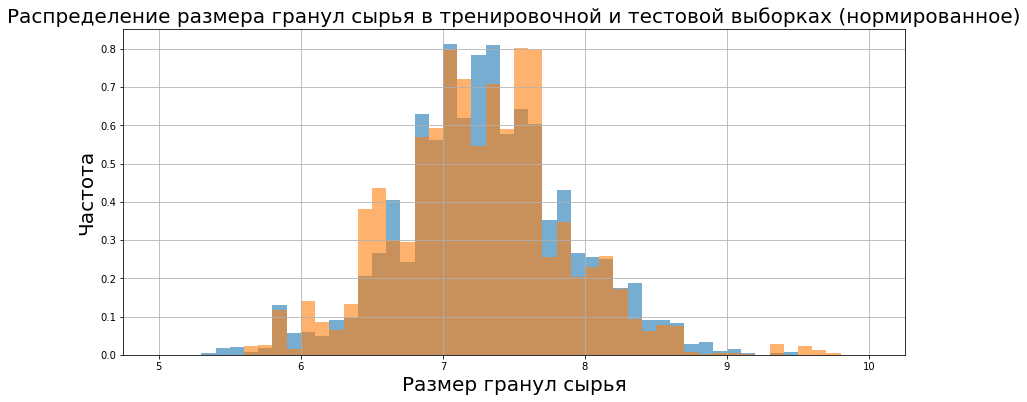

In [29]:
data_train_int['1cl_in_feed_size'].plot.hist(range=(5, 10), bins=50, figsize=(16, 6), density=True, alpha = 0.6)
data_test['1cl_in_feed_size'].plot.hist(range=(5, 10), bins=50, figsize=(14, 6), density=True, alpha = 0.6, grid=True)
plt.title('Распределение размера гранул сырья в тренировочной и тестовой выборках (нормированное)', fontsize=20) 
plt.ylabel('Частота', fontsize=20)
plt.xlabel('Размер гранул сырья', fontsize=20);

Распределения схожи. Выборка корректна.

<a name="43"></a>
### Исследование суммарных концентраций веществ на разных стадиях

Найдем суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах.

In [30]:
data_train_int['0cl_sum'] = data_train_int['0cl_in_feed_ag']
for col in ['0cl_in_feed_pb', '0cl_in_feed_sol', '0cl_in_feed_au']:
    data_train_int['0cl_sum'] += data_train_int[col]
    
data_train_int['1cl_sum'] = data_train_int['1cl_out_con_ag']
for col in ['1cl_out_con_pb', '1cl_out_con_sol', '1cl_out_con_au']:
    data_train_int['1cl_sum'] += data_train_int[col]

data_train_int['final_sum'] = data_train_int['final_out_con_ag']
for col in ['final_out_con_pb', 'final_out_con_sol', 'final_out_con_au']:
    data_train_int['final_sum'] += data_train_int[col]

sum_con = ['0cl_sum', '1cl_sum', 'final_sum']

In [31]:
data_train_int[sum_con].describe()

,0cl_sum,1cl_sum,final_sum
count,16860.000000,16860.000000,16860.000000
mean,50.437052,53.904050,61.284125
std,18.150602,20.549105,21.669294
min,0.000000,0.000000,0.000000
25%,50.255223,55.023514,66.533865
50%,55.772467,61.075012,68.802985
75%,60.258431,64.859092,70.693809
max,76.024095,76.918076,80.210644


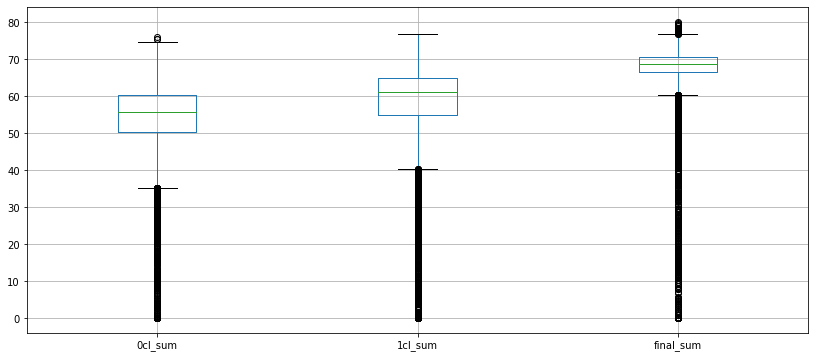

In [32]:
data_train_int[sum_con].boxplot(figsize=(14, 6));

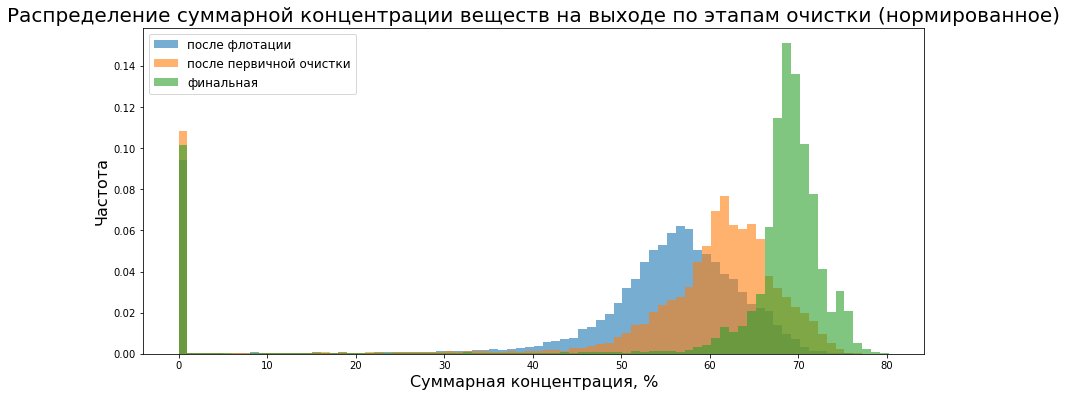

In [33]:
data_train_int[sum_con].plot.hist(bins=80, figsize=(14, 6), alpha = 0.6, density=True)
plt.title('Распределение суммарной концентрации веществ на выходе по этапам очистки (нормированное)', fontsize=20) 
plt.ylabel('Частота', fontsize=16)
plt.xlabel('Суммарная концентрация, %', fontsize=16)
plt.legend(['после флотации', 'после первичной очистки', 'финальная'], fontsize=12);

Вероятно суммарные значения концентрации металлов < 0,05 являются выбросами. Также считаю что целевая концентрация (0cl_in_feed_ag, 0cl_out_con_ag, 1cl_out_con_ag, final_out_con_ag) ниже 0,05 (%) является ошибкой оборудования и только внесет "шум" при обучении модели.

<a name="5"></a>
## Удаление выбросов
[Таблица имен DataFrame](#DataFrame_names) 

Реализовано 2 сценария обработки выбросов: не трогаем, удаляем концентрацию < 0.05. 

<a name="51"></a>
### Не удаляем

In [34]:
data_train_int_nodrop = data_train_int.copy()
data_train_fillna0_nodrop = data_train_fillna0.copy()
data_train_dropNA_nodrop = data_train_dropNA.copy()

<a name="52"></a>
### Удаляем строки с концентрацией < 0.05
*0.05 выбран из-за наличия в данных не толлько 0 но и 0.01*

In [35]:
#удаляем строки с суммарной концентрацией < 0.05 
con_threshold = 0.05
print(len(data_train_int.index))
data_train_int_drop1 = data_train_int[(data_train_int['0cl_sum']>con_threshold) | 
                                      (data_train_int['1cl_sum']>con_threshold) | 
                                      (data_train_int['final_sum']>con_threshold)]
print(len(data_train_int_drop1.index))

#удаляем строки с концентрацией золота по этапам < 0.05 - не нужно т.к. все такие строки отсеялись в предыдущей ячейке
data_train_int_drop2 = data_train_int_drop1[(data_train_int_drop1['0cl_in_feed_au']>con_threshold) | 
                                            (data_train_int_drop1['0cl_out_con_au']>con_threshold) | 
                                            (data_train_int_drop1['1cl_out_con_au']>con_threshold) | 
                                            (data_train_int_drop1['final_out_con_au']>con_threshold)]
print(len(data_train_int_drop2.index))
print(len(data_train_int_drop2.index)-len(data_train_int.index))

16860
15418
15418
-1442


In [36]:
#data_train_fillna0
#удаляем строки с концентрацией золота по этапам < 0.05 
print(len(data_train_fillna0.index))
data_train_fillna0_drop2 = data_train_fillna0[(data_train_fillna0['0cl_in_feed_au']>con_threshold) | 
                                              (data_train_fillna0['0cl_out_con_au']>con_threshold) | 
                                              (data_train_fillna0['1cl_out_con_au']>con_threshold) | 
                                              (data_train_fillna0['final_out_con_au']>con_threshold)]
print(len(data_train_fillna0_drop2.index))
print(len(data_train_fillna0_drop2.index)-len(data_train_fillna0.index))

16860
15405
-1455


In [37]:
#data_train_dropNA
#удаляем строки с концентрацией золота по этапам < 0.05 
print(len(data_train_dropNA.index))
data_train_dropNA_drop2 = data_train_dropNA[(data_train_dropNA['0cl_in_feed_au']>con_threshold) | 
                                            (data_train_dropNA['0cl_out_con_au']>con_threshold) | 
                                            (data_train_dropNA['1cl_out_con_au']>con_threshold) | 
                                            (data_train_dropNA['final_out_con_au']>con_threshold)]
print(len(data_train_dropNA_drop2.index))
print(data_train_dropNA_drop2['0cl_in_feed_au'].count()-data_train_dropNA['0cl_in_feed_au'].count())

11017
11017
0


В тестовых данных необходимо удалить строки с концентрацией во входящем сырье < 0.05 и заполняем NaN интерполяцией так как вероятнее всего эти пропуски связаны с поломкой оборудования.

In [38]:
print(len(data_test.index))
data_test_drop = data_test[(data_test['0cl_in_feed_au']>con_threshold) | 
                           (data_test['0cl_in_feed_pb']>con_threshold) |
                           (data_test['0cl_in_feed_ag']>con_threshold) |
                           (data_test['0cl_in_feed_sol']>con_threshold)]
print(len(data_test_drop.index))

5856
5471


In [39]:
data_test_drop.isna().sum().sum()

192

In [40]:
data_test_drop = data_test_drop.interpolate()

На удалении выбросов теряем: 
* тренировочная выборка - 1442 строки (8.5%) (суммарные концентрации и концентрации золота на каждом этапе <= 0.05)
* тестовая выборка - (369) строк (6.6%) (концентрации в cырье <= 0.05) 

192 пропуска в тестовой выборке заполнено интерполяцией

<a name="53"></a>
### Выбор и масштабирование признаков

In [41]:
#Столбцы признаков
features = data_test_drop.drop(['date'], axis='columns').columns #только столбцы которые есть в тестовой выборке
targets = ['0cl_out_recovery', 'final_out_recovery']

#список вариантов для обучающей выборки
data_list = [data_train_int_nodrop, data_train_int_drop2, 
             data_train_fillna0_nodrop, data_train_fillna0_drop2,
             data_train_dropNA_nodrop, data_train_dropNA_drop2]

#имена
data_train_int_nodrop.name = 'data_train_int_nodrop'
data_train_int_drop2.name = 'data_train_int_drop2'
data_train_fillna0_nodrop.name = 'data_train_fillna0_nodrop'
data_train_fillna0_drop2.name = 'data_train_fillna0_drop2'
data_train_dropNA_nodrop.name = 'data_train_dropNA_nodrop'
data_train_dropNA_drop2.name = 'data_train_dropNA_drop2'

In [42]:
scaler = StandardScaler()

scaler.fit(data_train[features])

data_test_drop[features] = scaler.transform(data_test_drop[features])

In [43]:
for d in data_list:
    print(d.name)
    print(d['0cl_in_feed_au'].mean())
    d[features] = scaler.transform(d[features])
    print(d['0cl_in_feed_au'].mean())
    print()


data_train_int_nodrop
7.140137643569596
-0.010186281753507222

data_train_int_drop2
7.80771180896743
0.21218841306958658

data_train_fillna0_nodrop
7.135416422354426
-0.011758961137062268

data_train_fillna0_drop2
7.809136701134103
0.21266305690265327

data_train_dropNA_nodrop
8.107739070690862
0.31213007382062974

data_train_dropNA_drop2
8.107739070690862
0.31213007382062974



<a name="6"></a>
## Функция для вычисления sMAPE

In [44]:
def smape_calc(targets, predictions):
    
    sm_r = 0
    sm_f = 0
    length = targets.shape[0]
    smape_val = 0
    
    for i in range(length):
        
        rrt = targets[i][0] # recovery rouger target
        rrp = predictions[i][0] # recovery rouger predicted
        sm_r += abs(rrt-rrp)/(abs(rrt)+abs(rrp))
        
        rft = targets[i][1] # recovery final target
        rfp = predictions[i][1] # recovery final predicted
        sm_f += abs(rft-rfp)/(abs(rft)+abs(rfp))
        
        smape_val = (2*0.25*sm_r+2*0.75*sm_f)/length
    return smape_val

<a name="7"></a>
## Обучение и проверка моделей

In [45]:
N = 5
kfold = KFold(n_splits=N, random_state=123, shuffle=True)
#train_test_indexes = kfold.split(features_train)

In [46]:
smape_score = make_scorer(smape_calc, greater_is_better=False)

In [47]:
# словарь с результатами моделей
model_dict = {}

<a name="71"></a>
### Линейная регрессия

In [48]:
model2 = LinearRegression()
smape_dict = {}

print('Линейная регрессия')
for d in data_list:
    smape_dict[d.name] = -cross_val_score(
        model2, d[features].values, d[targets].values, cv=kfold, scoring=smape_score).mean()
    print('sMAPE: %.3f' %(smape_dict[d.name]), 'данные:', d.name)

model_dict['LinearRegression'] = smape_dict

Линейная регрессия
sMAPE: 0.150 данные: data_train_int_nodrop
sMAPE: 0.115 данные: data_train_int_drop2
sMAPE: 0.338 данные: data_train_fillna0_nodrop
sMAPE: 0.193 данные: data_train_fillna0_drop2
sMAPE: 0.078 данные: data_train_dropNA_nodrop
sMAPE: 0.078 данные: data_train_dropNA_drop2


<a name="72"></a>
### Дерево решений

In [49]:
model3 = DecisionTreeRegressor()
smape_dict = {}

parametrs = { 'max_depth': [2, 3, 4], #, 8, 12, 16
              'min_samples_leaf': [2, 8, 12, 16], #24
              'min_samples_split': [2, 4, 6, 8] }

print('Дерево решений')
for d in data_list:
    grid3 = GridSearchCV(model3, parametrs, cv=kfold, scoring=smape_score)
    grid3.fit(d[features].values, d[targets].values)
    params = grid3.best_params_
    model3 = DecisionTreeRegressor().set_params(**params)
    smape_dict[d.name] = -grid3.best_score_
    print('sMAPE: %.3f' %smape_dict[d.name], 'данные:', d.name, 'параметры:', params)
    
model_dict['DecisionTreeRegressor'] = smape_dict

Дерево решений
sMAPE: 0.139 данные: data_train_int_nodrop параметры: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
sMAPE: 0.115 данные: data_train_int_drop2 параметры: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4}
sMAPE: 0.165 данные: data_train_fillna0_nodrop параметры: {'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 8}
sMAPE: 0.188 данные: data_train_fillna0_drop2 параметры: {'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 6}
sMAPE: 0.081 данные: data_train_dropNA_nodrop параметры: {'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 6}
sMAPE: 0.081 данные: data_train_dropNA_drop2 параметры: {'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 2}


<a name="73"></a>
### Случайный лес

In [50]:
model4 = RandomForestRegressor()
smape_dict = {}

parametrs = { 'max_depth': [2, 3, 4],
              'min_samples_leaf': [8, 12, 16, 20],
              'min_samples_split': [4, 8, 16],
              'n_estimators': [2, 4, 10]}

print('Случайный лес')
for d in data_list:
    grid4 = GridSearchCV(model4, parametrs, cv=kfold, scoring=smape_score)
    grid4.fit(d[features].values, d[targets].values)
    params = grid4.best_params_
    model4 = RandomForestRegressor().set_params(**params)
    smape_dict[d.name] = -grid4.best_score_
    print('sMAPE: %.3f' %smape_dict[d.name], 'данные:', d.name, 'параметры:', params)
    
model_dict['RandomForestRegressor'] = smape_dict

Случайный лес
sMAPE: 0.134 данные: data_train_int_nodrop параметры: {'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 10}
sMAPE: 0.112 данные: data_train_int_drop2 параметры: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 10}
sMAPE: 0.166 данные: data_train_fillna0_nodrop параметры: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 2}
sMAPE: 0.183 данные: data_train_fillna0_drop2 параметры: {'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 2}
sMAPE: 0.079 данные: data_train_dropNA_nodrop параметры: {'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 10}
sMAPE: 0.079 данные: data_train_dropNA_drop2 параметры: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}


<a name="74"></a>
### DummyRegressor

In [51]:
smape_dict = {}

print('DummyRegressor')
for d in data_list:
    model5 = DummyRegressor(strategy='median').fit(d[features].values, d[targets].values)
    smape_dict[d.name] = -cross_val_score(model5, d[features].values, d[targets].values, cv=kfold, scoring=smape_score).mean()
    print('sMAPE: %.3f' %smape_dict[d.name], 'данные:', d.name)

model_dict['DummyRegressor'] = smape_dict

DummyRegressor
sMAPE: 0.169 данные: data_train_int_nodrop
sMAPE: 0.130 данные: data_train_int_drop2
sMAPE: 0.322 данные: data_train_fillna0_nodrop
sMAPE: 0.189 данные: data_train_fillna0_drop2
sMAPE: 0.098 данные: data_train_dropNA_nodrop
sMAPE: 0.098 данные: data_train_dropNA_drop2


<a name="75"></a>
### Сравнение моделей

In [52]:
final_table = pd.DataFrame(model_dict)
final_table.style.format('{:.1%}').set_caption(
    'Значение sMAPE рассмотренных моделей для разных вариантов предобработки данных')

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,DummyRegressor
data_train_int_nodrop,15.0%,13.9%,13.4%,16.9%
data_train_int_drop2,11.5%,11.5%,11.2%,13.0%
data_train_fillna0_nodrop,33.8%,16.5%,16.6%,32.2%
data_train_fillna0_drop2,19.3%,18.8%,18.3%,18.9%
data_train_dropNA_nodrop,7.8%,8.1%,7.9%,9.8%
data_train_dropNA_drop2,7.8%,8.1%,7.9%,9.8%


<a name="8"></a>
## Проверка на тестовой выборке

In [53]:
#data_test_drop.info()

В data_test отсутствуют целевые столбцы - их значения получим из data_full

In [54]:
data_test_drop_merge = data_test_drop.merge(
    data_full[['date', '0cl_out_recovery', 'final_out_recovery']], on='date', how='left')

In [55]:
#data_test_drop_merge.isna().sum()

Из data_full в data_test_drop_merge попали пропуски (в целевых столбцах). Взять их значения негде (заполнять интерполяцией или другим способом будет не правильно) - поэтому удаляем.

In [56]:
print(data_test_drop_merge['date'].count())
data_test_drop_merge_drop = data_test_drop_merge.dropna()
print(data_test_drop_merge_drop['date'].count())

5471
5290


Удаляем 181 строку (3,1% от первоначального количества).

In [57]:
features_test = data_test_drop_merge_drop[features].values
target_test = data_test_drop_merge_drop[targets].values

In [60]:
#model2 = LinearRegression()
model2.fit(data_train_dropNA_drop2[features].values, data_train_dropNA_drop2[targets].values)
predictions_test = model2.predict(features_test)
test_sMAPE = smape_calc(target_test, predictions_test)
print('Модель: model2 (линейная регрессия обученная на data_train_dropNA_drop2)')
print('Итоговое sMAPE на тестовой выборке: %.4f' %test_sMAPE)

Модель: model2 (линейная регрессия обученная на data_train_dropNA_drop2)
Итоговое sMAPE на тестовой выборке: 0.0959


In [61]:
model5 = DummyRegressor(strategy='median').fit(
    data_train_dropNA_drop2[features].values, data_train_dropNA_drop2[targets].values)
predictions_test = model5.predict(features_test)
test_sMAPE = smape_calc(target_test, predictions_test)
print('Модель: model5 (DummyRegressor)')
print('Итоговое sMAPE на тестовой выборке: %.4f' %test_sMAPE)

Модель: model5 (DummyRegressor)
Итоговое sMAPE на тестовой выборке: 0.0958


<a name="9"></a>
## Выводы

Линейная регрессия позволила получить итоговое sMAPE на тестовой выборке равное 9,6%, при этом метрика у DummyRegressor почти такая-же. Для улучшения метрики моделей необходимо рассмотреть следующие действия: 
* выбор оптимального варианта очистки тренировочных/тестовых данных
* построение отдельных предсказательных моделей для rouger output recovery и final output recovery 
* работа с признаками (выбор наиболее значимых признаков, очистка от выбросов) для каждой модели
* более глубокий перебор гиперпараметров